<a href="https://colab.research.google.com/github/DominionAkinrotimi/Vowel-Counter/blob/main/FinalWeatherPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# File paths
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/weather data/2022.csv',
    '/content/drive/MyDrive/Colab Notebooks/weather data/2023.csv',
    '/content/drive/MyDrive/Colab Notebooks/weather data/2024.csv',
    '/content/drive/MyDrive/Colab Notebooks/weather data/2025.csv'
]

# Create an empty list to store dataframes
dfs = []

# Loop through file paths and read each CSV into a dataframe
for file_path in file_paths:
  try:
    df = pd.read_csv(file_path)
    dfs.append(df)
  except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
  except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file at {file_path}")
  except Exception as e:
    print(f"An unexpected error occurred while reading {file_path}: {e}")

# Concatenate all dataframes into a single dataframe
if dfs:
  df = pd.concat(dfs, ignore_index=True)
  print("Data loaded and combined successfully.")
  # Now you can work with the combined_df for your weather prediction model
  # Example: print the first few rows
  print(df.head(1))
else:
  print("No dataframes were loaded successfully.")


Data loaded and combined successfully.
       time  weather_code (wmo code)  temperature_2m_max (°C)  \
0  1/1/2022                       53                     36.3   

   temperature_2m_min (°C)  apparent_temperature_max (°C)  \
0                     23.0                           41.4   

   apparent_temperature_min (°C) sunrise (iso8601)  sunset (iso8601)  \
0                           28.0  2022-01-01T07:51  2022-01-01T19:37   

   daylight_duration (s)  sunshine_duration (s)  ...  rain_sum (mm)  \
0               42333.92               36089.12  ...            0.0   

   showers_sum (mm)  snowfall_sum (cm)  precipitation_hours (h)  \
0               0.7                  0                        1   

   precipitation_probability_max (%)  wind_speed_10m_max (km/h)  \
0                                NaN                       14.6   

   wind_gusts_10m_max (km/h)  wind_direction_10m_dominant (°)  \
0                       19.8                              228   

   shortwave_radia

In [ ]:
df.head()

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),daylight_duration (s),sunshine_duration (s),...,rain_sum (mm),showers_sum (mm),snowfall_sum (cm),precipitation_hours (h),precipitation_probability_max (%),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,1/1/2022,53,36.3,23.0,41.4,28.0,2022-01-01T07:51,2022-01-01T19:37,42333.92,36089.12,...,0.0,0.7,0,1,NaN,14.6,19.8,228,18.66,4.38
1,1/2/2022,53,37.8,22.9,42.8,27.8,2022-01-02T07:52,2022-01-02T19:37,42339.01,38905.46,...,0.0,3.9,0,6,NaN,14.3,20.2,244,21.28,4.92
2,1/3/2022,3,38.3,22.4,39.8,25.9,2022-01-03T07:52,2022-01-03T19:38,42344.54,38959.14,...,0.0,0.0,0,0,NaN,15.8,23.8,219,22.78,5.43
3,1/4/2022,3,37.3,21.8,37.4,23.8,2022-01-04T07:52,2022-01-04T19:38,42350.58,38936.90,...,0.0,0.0,0,0,NaN,13.8,21.6,124,21.87,5.25
4,1/5/2022,3,37.3,21.1,39.0,23.0,2022-01-05T07:53,2022-01-05T19:39,42357.12,38995.71,...,0.0,0.0,0,0,NaN,11.7,16.6,300,20.95,4.77


In [ ]:
df.describe()

,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),daylight_duration (s),sunshine_duration (s),uv_index_max (),uv_index_clear_sky_max (),precipitation_sum (mm),rain_sum (mm),showers_sum (mm),snowfall_sum (cm),precipitation_hours (h),precipitation_probability_max (%),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.0,1152.000000,0.0,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,60.735243,31.998437,24.490799,37.157118,29.908160,43593.544948,33314.711936,7.233247,8.260764,3.678906,0.166840,3.502344,0.0,6.210938,NaN,13.992014,27.846441,218.756944,17.849826,3.912526
std,32.516603,3.176264,1.573456,3.161907,2.612984,925.412601,9225.804941,1.255368,0.428362,5.791890,1.838949,5.213726,0.0,6.163691,NaN,2.851729,5.184813,37.244000,3.931059,0.996760
min,0.000000,23.500000,17.700000,27.900000,16.000000,42306.490000,0.000000,0.850000,7.400000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,5.200000,10.100000,8.000000,0.990000,0.420000
25%,45.000000,29.300000,23.600000,34.700000,28.600000,42691.262500,31478.280000,6.850000,8.000000,0.100000,0.000000,0.100000,0.0,1.000000,NaN,12.000000,24.500000,211.000000,15.865000,3.300000
50%,80.000000,32.300000,24.600000,37.800000,30.100000,43542.925000,36824.680000,7.500000,8.275000,1.300000,0.000000,1.300000,0.0,5.000000,NaN,13.900000,27.400000,226.000000,18.465000,4.000000
75%,81.000000,34.500000,25.500000,39.600000,31.700000,44501.925000,39406.142500,7.950000,8.600000,4.825000,0.000000,4.700000,0.0,10.000000,NaN,16.100000,31.300000,238.000000,20.447500,4.562500
max,96.000000,40.000000,28.300000,45.700000,34.800000,44971.950000,41936.520000,9.000000,9.000000,64.100000,52.500000,32.700000,0.0,24.000000,NaN,22.700000,56.500000,359.000000,25.810000,6.700000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   time                               1152 non-null   object 
 1   weather_code (wmo code)            1152 non-null   int64  
 2   temperature_2m_max (°C)            1152 non-null   float64
 3   temperature_2m_min (°C)            1152 non-null   float64
 4   apparent_temperature_max (°C)      1152 non-null   float64
 5   apparent_temperature_min (°C)      1152 non-null   float64
 6   sunrise (iso8601)                  1152 non-null   object 
 7   sunset (iso8601)                   1152 non-null   object 
 8   daylight_duration (s)              1152 non-null   float64
 9   sunshine_duration (s)              1152 non-null   float64
 10  uv_index_max ()                    1152 non-null   float64
 11  uv_index_clear_sky_max ()          1152 non-null   float

In [ ]:
df.drop(columns=['precipitation_probability_max (%)'], inplace=True)

In [ ]:
df.shape

(1152, 22)

In [ ]:
import numpy as np

df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day_of_week'] = df['time'].dt.dayofweek
df['season'] = df['month'] % 12 // 3  # (Winter=0, Spring=1, Summer=2, Fall=3)
df['daylight_hours'] = df['daylight_duration (s)'] / 3600
df['temperature_range'] = df['temperature_2m_max (°C)'] - df['temperature_2m_min (°C)']
df['precipitation_intensity'] = df['precipitation_sum (mm)'] / (df['precipitation_hours (h)'] + 1)  # Avoid division by zero

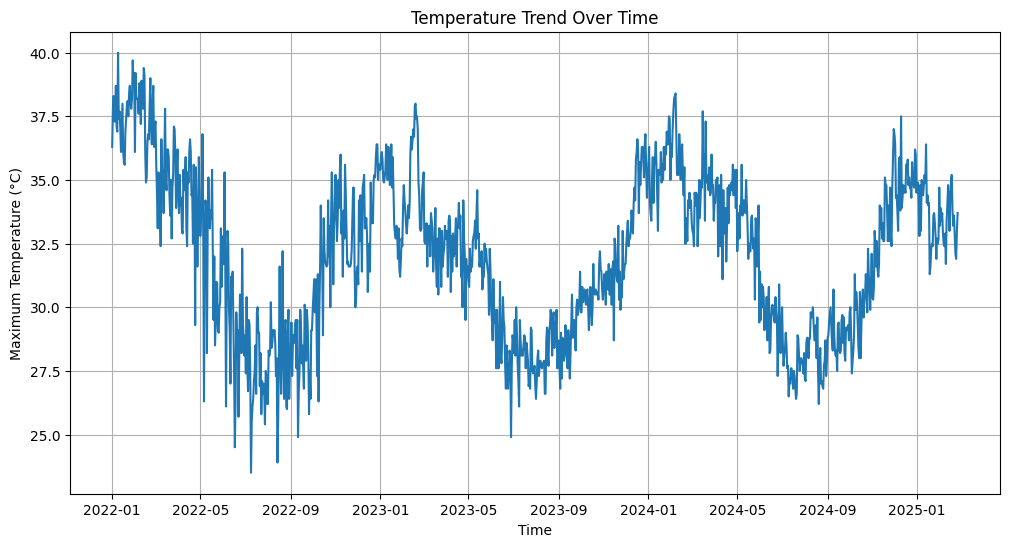

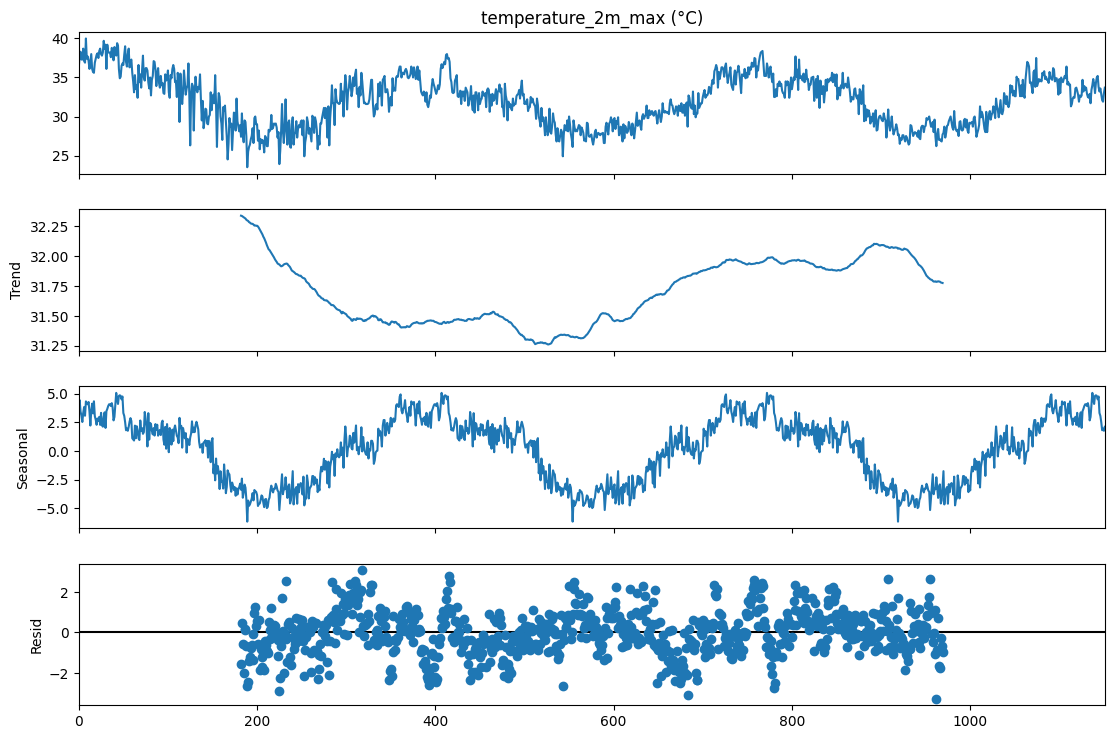

Mean Absolute Error: 0.7425760233759697


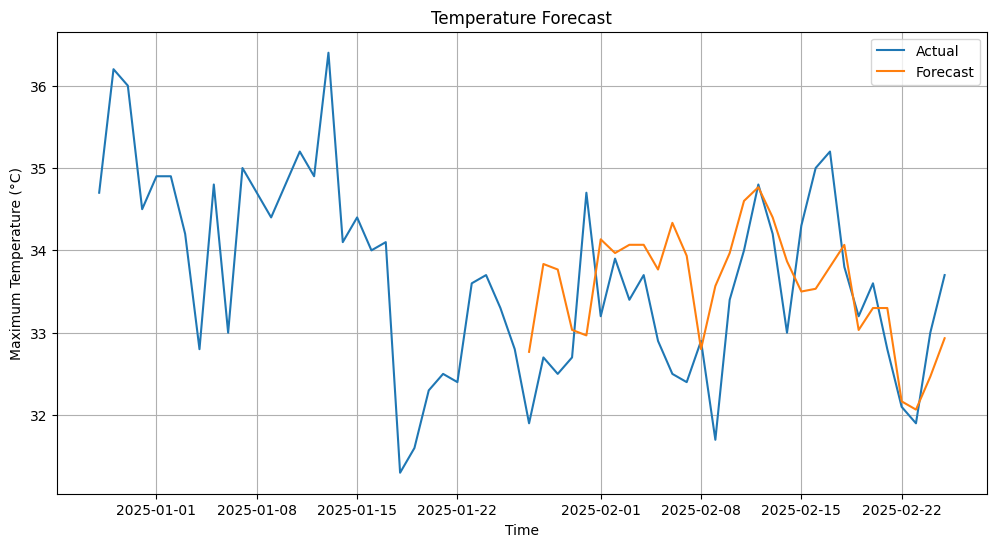

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 1. Visualize Trends Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['temperature_2m_max (°C)'])
plt.xlabel('Time')
plt.ylabel('Maximum Temperature (°C)')
plt.title('Temperature Trend Over Time')
plt.grid(True)
plt.show()


# 2. Time Series Decomposition (Trend, Seasonality, Residuals)
decomposition = seasonal_decompose(df['temperature_2m_max (°C)'], model='additive', period=365)  # Adjust period as needed
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()


# 3. Forecasting using Exponential Smoothing
# Prepare data
train_data = df['temperature_2m_max (°C)'][:-30]  # Use a portion of data for training
test_data = df['temperature_2m_max (°C)'][-30:] # Use last 30 days for testing


# Fit the model
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=365) # Adjust periods and components as needed
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=30)  # Forecast the next 30 days


# Evaluate the forecast (example using Mean Absolute Error)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error: {mae}")

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['time'][-60:], df['temperature_2m_max (°C)'][-60:], label='Actual')  # Plot actual data for the last 60 days
plt.plot(df['time'][-30:], predictions, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Maximum Temperature (°C)')
plt.title('Temperature Forecast')
plt.legend()
plt.grid(True)
plt.show()

Rainy Season start: 2022-03-03 00:00:00
Frequent rain threshold: 10.4


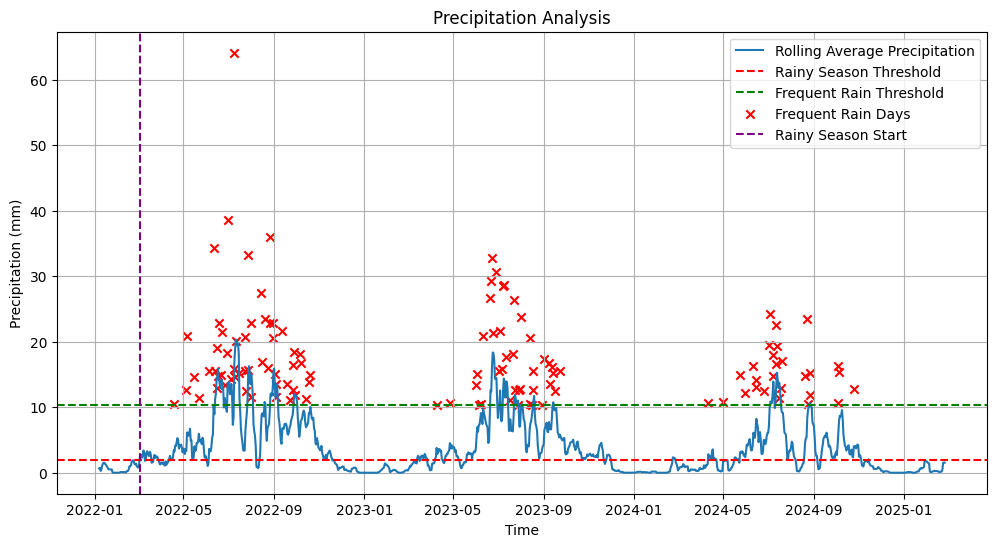

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

# --- Rain analysis ---
# Calculate a rolling average of precipitation to smooth out daily variations
df['rolling_precipitation'] = df['precipitation_sum (mm)'].rolling(window=7).mean()

# Identify the start of rainy season based on a threshold (e.g., average precipitation above 2mm)
rainy_season_start = df[df['rolling_precipitation'] > 2]['time'].min()
print(f"Rainy Season start: {rainy_season_start}")

# Calculate a threshold for frequent rain (e.g., 90th percentile of precipitation)
frequent_rain_threshold = df['precipitation_sum (mm)'].quantile(0.90)
print(f"Frequent rain threshold: {frequent_rain_threshold}")


# Identify days with frequent rain
df['frequent_rain'] = df['precipitation_sum (mm)'] >= frequent_rain_threshold


# Plot rolling precipitation with rainy season start and frequent rain threshold
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['rolling_precipitation'], label='Rolling Average Precipitation')
plt.axhline(y=2, color='r', linestyle='--', label='Rainy Season Threshold')
plt.axhline(y=frequent_rain_threshold, color='g', linestyle='--', label='Frequent Rain Threshold')
plt.scatter(df[df['frequent_rain']]['time'], df[df['frequent_rain']]['precipitation_sum (mm)'], color='red', label='Frequent Rain Days', marker='x')
if pd.notna(rainy_season_start):
  plt.axvline(x=rainy_season_start, color='purple', linestyle='--', label='Rainy Season Start')


plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation Analysis')
plt.legend()
plt.grid(True)
plt.show()


Forecasted start of rainy season in 2025: 2025-03-08 00:00:00


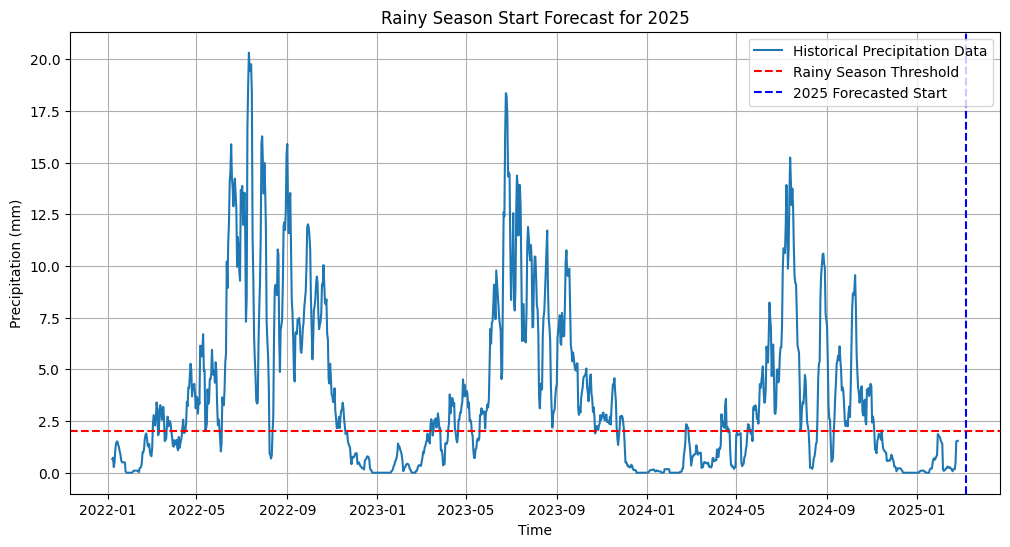


Standard deviation of historical start days: 5.50 days
95% Confidence Interval: (-2.3841260503765085, 137.3841260503765)


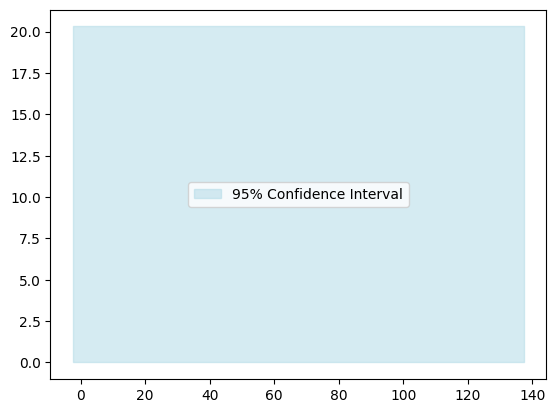

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Find the average day of the year when the rainy season starts in previous years
rainy_season_start_days = []
for year in df['year'].unique():
    if year < 2024:  # Exclude 2024 as it's part of your training data
      year_df = df[df['year'] == year]
      rainy_season_start_year = year_df[year_df['rolling_precipitation'] > 2]['time'].min()
      if pd.notna(rainy_season_start_year):
          rainy_season_start_days.append(rainy_season_start_year.dayofyear)

if rainy_season_start_days:
    average_start_day = np.mean(rainy_season_start_days)
    # Estimate the start date for 2025
    forecast_start_date_2025 = pd.to_datetime(f"2025-{int(average_start_day)}", format="%Y-%j")
    print(f"Forecasted start of rainy season in 2025: {forecast_start_date_2025}")

    # Plotting a forecast diagram

    plt.figure(figsize=(12, 6))
    #Plot the past rainfall data
    plt.plot(df['time'], df['rolling_precipitation'], label='Historical Precipitation Data')
    plt.axhline(y=2, color='r', linestyle='--', label='Rainy Season Threshold')

    # Mark the forecasted start of the rainy season in 2025
    plt.axvline(x=forecast_start_date_2025, color='b', linestyle='--', label='2025 Forecasted Start')

    plt.xlabel('Time')
    plt.ylabel('Precipitation (mm)')
    plt.title('Rainy Season Start Forecast for 2025')
    plt.legend()
    plt.grid(True)
    plt.show()

        # --- Confidence Estimation ---

    # 1. Standard Deviation of Historical Start Days:
    std_dev = np.std(rainy_season_start_days)
    print(f"\nStandard deviation of historical start days: {std_dev:.2f} days")

    # 2. Confidence Interval:
    # Calculate a confidence interval around the average start day
    confidence_level = 0.95  # 95% confidence interval
    confidence_interval = stats.t.interval(confidence_level, len(rainy_season_start_days) - 1,
                                           loc=average_start_day, scale=stats.sem(rainy_season_start_days))
    print(f"{confidence_level*100:.0f}% Confidence Interval: {confidence_interval}")

    # 3. Visualize Confidence Interval:
    # You can add the confidence interval to your plot:
    plt.fill_betweenx([0, df['rolling_precipitation'].max()], confidence_interval[0], confidence_interval[1],
                      color='lightblue', alpha=0.5, label=f"{confidence_level*100:.0f}% Confidence Interval")
    plt.legend()  # Update legend

else:
    print("Not enough historical data to make a reliable forecast.")


<ipython-input-13-74155d4382a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025['rolling_precipitation'] = df_2025['precipitation_sum (mm)'].rolling(window=7).mean()


Could not determine the start of the rainy season for 2025 based on the current data.


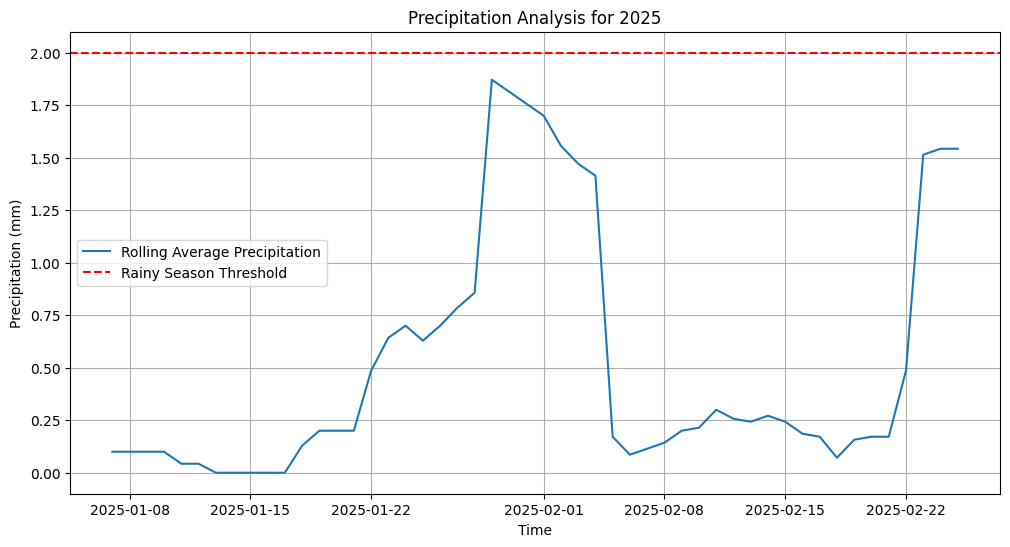

In [ ]:
# Filter data for 2025
df_2025 = df[df['year'] == 2025]

# Calculate rolling average precipitation for 2025
df_2025['rolling_precipitation'] = df_2025['precipitation_sum (mm)'].rolling(window=7).mean()

# Identify the start of the rainy season in 2025 (adjust threshold if needed)
rainy_season_start_2025 = df_2025[df_2025['rolling_precipitation'] > 2]['time'].min()

# Print or use the predicted rainy season start date
if pd.notna(rainy_season_start_2025):
    print(f"Predicted Rainy Season Start for 2025: {rainy_season_start_2025}")
else:
    print("Could not determine the start of the rainy season for 2025 based on the current data.")


plt.figure(figsize=(12, 6))
plt.plot(df_2025['time'], df_2025['rolling_precipitation'], label='Rolling Average Precipitation')
plt.axhline(y=2, color='r', linestyle='--', label='Rainy Season Threshold')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation Analysis for 2025')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
lag_features = ['temperature_2m_max (°C)', 'temperature_2m_min (°C)',
                'precipitation_sum (mm)', 'wind_speed_10m_max (km/h)']

for feature in lag_features:
    df[f'{feature}_lag1'] = df[feature].shift(1)  # Use yesterday’s values

df.dropna(inplace=True)  # Drop first row due to lag

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression

# Define features (X) and target variable (y)
target_variables = ['temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'precipitation_sum (mm)']
# Exclude 'time' and other non-numeric columns from features
features = [col for col in df.columns if col not in target_variables and col not in ['time', 'sunrise (iso8601)', 'sunset (iso8601)']]  # Exclude 'time' column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target_variables], test_size=0.2, random_state=42)

# Calculate mutual information for each target variable
for target_variable in target_variables:
    mi_scores = mutual_info_regression(X_train, y_train[target_variable])

    # Create a DataFrame for feature importances
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': mi_scores})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print(f"Feature importance for {target_variable} (using Mutual Information):\n{feature_importance_df}\n")

Feature importance for temperature_2m_max (°C) (using Mutual Information):
                            Feature  Importance
1     apparent_temperature_max (°C)    1.145263
21                temperature_range    0.995029
25     temperature_2m_max (°C)_lag1    0.824620
15  et0_fao_evapotranspiration (mm)    0.824498
17                            month    0.696449
23            rolling_precipitation    0.536559
19                           season    0.531417
10          precipitation_hours (h)    0.525273
14  shortwave_radiation_sum (MJ/m²)    0.519721
8                  showers_sum (mm)    0.411950
3             daylight_duration (s)    0.357106
20                   daylight_hours    0.357106
2     apparent_temperature_min (°C)    0.330181
26     temperature_2m_min (°C)_lag1    0.309739
0           weather_code (wmo code)    0.300242
6         uv_index_clear_sky_max ()    0.280619
22          precipitation_intensity    0.266992
4             sunshine_duration (s)    0.257059
27      preci

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import time

threshold = 0.2
results = []

# Iterate through target variables and select important features
for target_variable in target_variables:
    mi_scores = mutual_info_regression(X_train, y_train[target_variable])
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': mi_scores})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Select features above the threshold
    important_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

    # Split data using only important features
    X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
        df[important_features], df[[target_variable]], test_size=0.2, random_state=42
    )

    print(f"For target variable '{target_variable}' important features are: {important_features}")
    print(f"Shape of X_train_selected: {X_train_selected.shape}")
    print(f"Shape of X_test_selected: {X_test_selected.shape}")
    print(f"Shape of y_train_selected: {y_train_selected.shape}")
    print(f"Shape of y_test_selected: {y_test_selected.shape}\n")

    # XGBoost Model
    start_time = time.time()
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_model.fit(X_train_selected, y_train_selected)
    xgb_predictions = xgb_model.predict(X_test_selected)
    xgb_mse = mean_squared_error(y_test_selected, xgb_predictions)
    xgb_r2 = r2_score(y_test_selected, xgb_predictions)
    xgb_train_time = time.time() - start_time

    # LightGBM Model
    start_time = time.time()
    lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42)
    lgb_model.fit(X_train_selected, y_train_selected)
    lgb_predictions = lgb_model.predict(X_test_selected)
    lgb_mse = mean_squared_error(y_test_selected, lgb_predictions)
    lgb_r2 = r2_score(y_test_selected, lgb_predictions)
    lgb_train_time = time.time() - start_time

    print(f"Results for target variable: {target_variable}")
    print(f"XGBoost - Mean Squared Error: {xgb_mse}, R-squared: {xgb_r2},Training Time = {xgb_train_time:.2f} sec")
    print(f"LightGBM - Mean Squared Error: {lgb_mse}, R-squared: {lgb_r2},Training Time = {lgb_train_time:.2f} sec")
    print("-" * 30)

    # Calculate additional metrics
    xgb_mae = mean_absolute_error(y_test_selected, xgb_predictions)
    xgb_mape = mean_absolute_percentage_error(y_test_selected, xgb_predictions)
    lgb_mae = mean_absolute_error(y_test_selected, lgb_predictions)
    lgb_mape = mean_absolute_percentage_error(y_test_selected, lgb_predictions)

    results.append({
        'Target Variable': target_variable,
        'Model': 'XGBoost',
        'MSE': xgb_mse,
        'MAE': xgb_mae,
        'MAPE': xgb_mape,
        'R-squared': xgb_r2,
        'Training Time': xgb_train_time
    })
    results.append({
        'Target Variable': target_variable,
        'Model': 'LightGBM',
        'MSE': lgb_mse,
        'MAE': lgb_mae,
        'MAPE': lgb_mape,
        'R-squared': lgb_r2,
        'Training Time': lgb_train_time
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)


For target variable 'temperature_2m_max (°C)' important features are: ['apparent_temperature_max (°C)', 'temperature_range', 'temperature_2m_max (°C)_lag1', 'et0_fao_evapotranspiration (mm)', 'month', 'season', 'rolling_precipitation', 'shortwave_radiation_sum (MJ/m²)', 'precipitation_hours (h)', 'showers_sum (mm)', 'daylight_duration (s)', 'daylight_hours', 'apparent_temperature_min (°C)', 'temperature_2m_min (°C)_lag1', 'weather_code (wmo code)', 'uv_index_clear_sky_max ()', 'precipitation_intensity', 'sunshine_duration (s)', 'precipitation_sum (mm)_lag1']
Shape of X_train_selected: (916, 19)
Shape of X_test_selected: (230, 19)
Shape of y_train_selected: (916, 1)
Shape of y_test_selected: (230, 1)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2718
[LightGBM] [In

In [ ]:
results_df

,Target Variable,Model,MSE,MAE,MAPE,R-squared,Training Time
0,temperature_2m_max (°C),XGBoost,0.220887,0.362508,1.137903e-02,0.978465,2.056861
1,temperature_2m_max (°C),LightGBM,0.184081,0.329082,1.043997e-02,0.982054,0.275954
2,temperature_2m_min (°C),XGBoost,0.075411,0.178146,7.403736e-03,0.968463,0.908740
3,temperature_2m_min (°C),LightGBM,0.083137,0.192408,8.022183e-03,0.965232,0.247188
4,precipitation_sum (mm),XGBoost,1.049203,0.285693,7.149623e+12,0.971872,1.509227
5,precipitation_sum (mm),LightGBM,0.963805,0.288008,2.400299e+13,0.974162,0.270041


In [ ]:
from google.colab import files

# Save the DataFrame to a CSV file first
results_df.to_csv('results_df.csv', index=False)

# Now you can download the saved file
files.download('results_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Compute monthly average for key features, excluding non-numeric columns
monthly_avg = df.groupby("month").agg({col: 'mean' for col in df.select_dtypes(include=['number']).columns})

# Instead of reset_index, rename the index to avoid conflict if 'month' already exists
monthly_avg = monthly_avg.rename_axis(index={'month': 'month_index'})
monthly_avg = monthly_avg.reset_index() # Now reset the index

# Generate future timestamps (next 12 months)
future_dates = pd.date_range(start=df["time"].max(), periods=12, freq="M")

# Create a DataFrame for future weather
future_weather = pd.DataFrame({"time": future_dates})
future_weather["month"] = future_weather["time"].dt.month

# Merge with historical averages to generate estimates
future_weather = future_weather.merge(monthly_avg, on="month", how="left")

print(future_weather.head())

        time  month  month_index  weather_code (wmo code)  \
0 2025-02-28      2            2                28.618182   
1 2025-03-31      3            3                56.989247   
2 2025-04-30      4            4                59.522222   
3 2025-05-31      5            5                70.311828   
4 2025-06-30      6            6                81.922222   

   temperature_2m_max (°C)  temperature_2m_min (°C)  \
0                35.400000                25.177273   
1                34.066667                25.918280   
2                33.555556                25.730000   
3                32.336559                25.109677   
4                29.284444                24.105556   

   apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
0                      40.232727                      30.886364   
1                      39.576344                      31.944086   
2                      39.094444                      31.658889   
3                      38.127957  

<ipython-input-25-d64556dabcec>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df["time"].max(), periods=12, freq="M")


In [ ]:
# Compute monthly average for key features, excluding non-numeric columns
monthly_avg = df.groupby("month").agg({col: 'mean' for col in df.select_dtypes(include=['number']).columns})

# Instead of reset_index, rename the index to avoid conflict if 'month' already exists
monthly_avg = monthly_avg.rename_axis(index={'month': 'month_index'})
monthly_avg = monthly_avg.reset_index() # Now reset the index

# Generate future timestamps (next 12 months)
future_dates = pd.date_range(start=df["time"].max(), periods=12, freq="M")

# Create a DataFrame for future weather
future_weather = pd.DataFrame({"time": future_dates})
future_weather["month"] = future_weather["time"].dt.month

# Merge with historical averages to generate estimates
future_weather = future_weather.merge(monthly_avg, on="month", how="left")

# *** Add this line to create 'frequent_rain' column in future_weather ***
future_weather['frequent_rain'] = 0  # Or any other suitable default value

print(future_weather.head())

        time  month  month_index  weather_code (wmo code)  \
0 2025-02-28      2            2                28.618182   
1 2025-03-31      3            3                56.989247   
2 2025-04-30      4            4                59.522222   
3 2025-05-31      5            5                70.311828   
4 2025-06-30      6            6                81.922222   

   temperature_2m_max (°C)  temperature_2m_min (°C)  \
0                35.400000                25.177273   
1                34.066667                25.918280   
2                33.555556                25.730000   
3                32.336559                25.109677   
4                29.284444                24.105556   

   apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
0                      40.232727                      30.886364   
1                      39.576344                      31.944086   
2                      39.094444                      31.658889   
3                      38.127957  

<ipython-input-26-e504b257c22c>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df["time"].max(), periods=12, freq="M")


<ipython-input-27-9923d365ac50>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df["time"].max(), periods=12, freq="M")


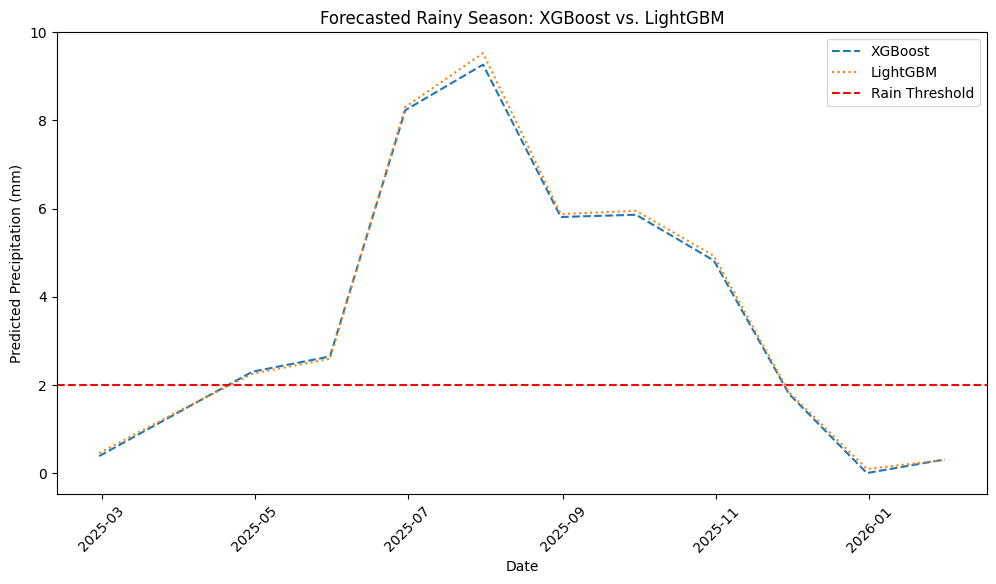

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Assuming 'df', 'important_features', 'target_variables', and 'xgb_model', 'lgb_model' from previous cells are available

# Compute monthly average for key features, excluding non-numeric columns
monthly_avg = df.groupby("month").agg({col: 'mean' for col in df.select_dtypes(include=['number']).columns})

# Instead of reset_index, rename the index to avoid conflict if 'month' already exists
monthly_avg = monthly_avg.rename_axis(index={'month': 'month_index'})
monthly_avg = monthly_avg.reset_index() # Now reset the index

# Generate future timestamps (next 12 months)
future_dates = pd.date_range(start=df["time"].max(), periods=12, freq="M")

# Create a DataFrame for future weather
future_weather = pd.DataFrame({"time": future_dates})
future_weather["month"] = future_weather["time"].dt.month

# Merge with historical averages to generate estimates
future_weather = future_weather.merge(monthly_avg, on="month", how="left")

# *** Add this line to create 'frequent_rain' column in future_weather ***
future_weather['frequent_rain'] = 0  # Or any other suitable default value


# Make predictions using your trained models and add them to future_weather
# Select important features for precipitation prediction (assuming 'precipitation_sum (mm)' is the target variable)
precipitation_features = important_features # Replace with the correct list of important features

# Generate predictions for future weather using XGBoost and LightGBM
future_weather['precipitation_xgb'] = xgb_model.predict(future_weather[precipitation_features]) # Assuming you have an xgb_model trained for precipitation
future_weather['precipitation_lgb'] = lgb_model.predict(future_weather[precipitation_features]) # Assuming you have an lgb_model trained for precipitation


plt.figure(figsize=(12, 6))

# Plot the predicted precipitation
plt.plot(future_weather["time"], future_weather["precipitation_xgb"], label="XGBoost", linestyle="--")
plt.plot(future_weather["time"], future_weather["precipitation_lgb"], label="LightGBM", linestyle=":")

# Assuming you have a rain_threshold defined somewhere (e.g., from your rain analysis)
rain_threshold = 2 # Example threshold - adjust as needed
plt.axhline(y=rain_threshold, color="red", linestyle="dashed", label="Rain Threshold")

plt.xlabel("Date")
plt.ylabel("Predicted Precipitation (mm)")
plt.title("Forecasted Rainy Season: XGBoost vs. LightGBM")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
forecast_start_date_2025


Timestamp('2025-03-08 00:00:00')

In [ ]:

# Define rain threshold (adjust based on analysis)
rain_threshold = 5  # mm of precipitation

# Create binary target variable
df["rainy_day"] = (df["precipitation_sum (mm)"] >= rain_threshold).astype(int)

# Drop unnecessary columns
df = df.drop(["time", "sunrise (iso8601)", "sunset (iso8601)"], axis=1)

# Display the first few rows
print(df.head())


    weather_code (wmo code)  temperature_2m_max (°C)  temperature_2m_min (°C)  \
6                         1                     37.1                     22.1   
7                        55                     36.9                     23.0   
8                        51                     40.0                     23.4   
9                        53                     37.4                     22.8   
10                       80                     37.7                     23.0   

    apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
6                            41.3                           26.3   
7                            41.5                           27.8   
8                            42.1                           28.3   
9                            42.0                           27.4   
10                           42.7                           28.0   

    daylight_duration (s)  sunshine_duration (s)  uv_index_max ()  \
6                42371.68          

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define input features and target
X = df.drop("rainy_day", axis=1)
y = df["rainy_day"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Train LightGBM Classifier
lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.1)
lgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate models
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))

print("\nXGBoost Report:\n", classification_report(y_test, y_pred_xgb))
print("\nLightGBM Report:\n", classification_report(y_test, y_pred_lgb))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 219, number of negative: 697
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3527
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.239083 -> initscore=-1.157714
[LightGBM] [Info] Start training from score -1.157714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain